<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/TemporalAvgBGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Détection de changements: Méthode de la moyenne temporelle

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF6804
%cd INF6804

Cloning into 'INF6804'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 271 (delta 48), reused 24 (delta 6), pack-reused 165
Receiving objects: 100% (271/271), 31.90 MiB | 31.59 MiB/s, done.
Resolving deltas: 100% (110/110), done.
/content/INF6804


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Lecture d'images pour entraîner le modèle. (Images provenant de PETS 2006, http://www.cvg.reading.ac.uk/PETS2006/data.html)

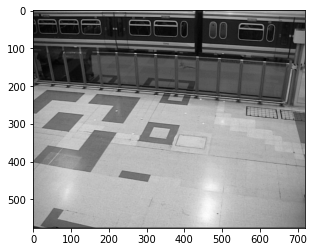

In [3]:
image1 = (cv2.imread('images/in000001.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
plt.imshow(image1, cmap = plt.get_cmap('gray'))
plt.show()
image2 = (cv2.imread('images/in000003.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
image3 = (cv2.imread('images/in000004.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
image4 = (cv2.imread('images/in000005.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)

Dans cet exemple, les calculs sont faits sur une image en tons de gris. Pour entraîner le modèle, on doit calculer la moyenne. Ce modèle est le modèle de l'arrière-plan de la scène.


In [4]:
Moy = (image1 + image2 + image3 + image4)/4.0

Lecture de l'image qui sera utilisée pour la détection de changements.

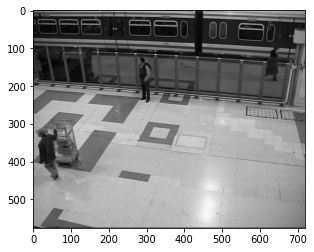

In [5]:
imagedet = (cv2.imread('images/in000235.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
plt.imshow(imagedet, cmap = plt.get_cmap('gray'))
plt.show()

Les changements sont constitué des pixels qui ne correspondent pas au modèle d'arrière-plan. Ces pixels sont considérés comme l'avant-plan.

In [6]:
n = 15 #Ajuste la sensibilité de la détection
Avantplan = np.abs(imagedet - Moy)> n

Affichage du résultats avec l'avant-plan en blanc.

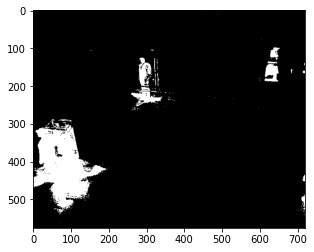

In [7]:
plt.imshow(~Avantplan,plt.get_cmap('binary'))
plt.show()

Il faudrait trouver le meilleur seuil n. Seuil unique pour tous les pixels.